<a href="https://colab.research.google.com/github/muhammaddurri/Praktikum-Machine-Learning-/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn import datasets

In [4]:
diabetes = datasets.load_diabetes()


In [5]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [8]:
X = diabetes.data
Y = diabetes.target

In [9]:
X.shape, Y.shape

((442, 10), (442,))

In [10]:
X, Y = datasets.load_diabetes(return_X_y=True)

In [11]:
X.shape, Y.shape

((442, 10), (442,))

In [12]:
import pandas as pd

In [13]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2025-09-20 13:21:20--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2025-09-20 13:21:20--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0.01s   

2025-09-20 13:21:20 (3.55 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



In [14]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [15]:
Y = BostonHousing.medv
Y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [16]:
X = BostonHousing.drop(['medv'], axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
X_train.shape, Y_train.shape

((404, 13), (404,))

In [20]:
X_test.shape, Y_test.shape

((102, 13), (102,))

In [21]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
model = linear_model.LinearRegression()

In [23]:
model.fit(X_train, Y_train)

LinearRegression()

In [24]:
Y_pred = model.predict(X_test)

In [25]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-1.09393799e-01  3.10561601e-02 -1.77935458e-02  1.95618898e+00
 -1.86711419e+01  3.36933435e+00 -4.53103015e-04 -1.47907233e+00
  2.87103840e-01 -1.09590001e-02 -9.90309002e-01  8.12526082e-03
 -5.41182753e-01]
Intercept: 41.38828467885274
Mean squared error (MSE): 21.80
Coefficient of determination (R^2): 0.75


In [26]:
r2_score(Y_test, Y_pred)

0.7539012506603701

In [28]:
r2 = r2_score(Y_test, Y_pred)
print(r2)


0.7539012506603701


In [29]:
type(r2_score(Y_test, Y_pred))


float

In [31]:
import numpy as np

In [32]:
r2 = np.array(r2_score(Y_test, Y_pred))
print(r2.dtype)

float64


In [33]:
r2 = np.array(r2_score(Y_test, Y_pred))
print(r2.dtype)

float64


In [34]:
'%f' % 0.523810833536016

'0.523811'

In [35]:
'%.3f' % 0.523810833536016

'0.524'

In [36]:
'%.2f' % 0.523810833536016

'0.52'

In [37]:

import seaborn as sns

In [38]:
Y_test

,medv
240,22.0
305,28.4
58,23.3
37,21.0
196,33.3
...,...
178,29.9
180,39.8
145,13.8
504,22.0


In [39]:
import numpy as np
np.array(Y_test)

array([22. , 28.4, 23.3, 21. , 33.3, 11.9,  8.7, 19.1, 23.2, 13.3, 28.7,
       23.7, 22.2, 22.2, 19.6, 24.7, 35.2, 10.4, 28.6, 14.6, 31.2, 18.9,
       15. , 14.4, 20. , 21.6, 17.1, 37.6, 50. , 19.9, 16.8, 19.2, 50. ,
       29.1, 24.8, 25.2, 25. , 20.5, 31.7, 21.4, 19.2, 20.5, 20.1, 43.1,
       24.2, 13.1, 23.7, 18.3, 18.6, 16.1, 22.8, 24.7, 22.8, 25.1, 17.2,
       18.9, 23.1, 21.4, 23.8, 20.1, 24.4, 14.3, 23.9, 31.1, 14.1, 20.8,
       20.4, 13.9, 27.1, 27.9, 16.8, 33.2, 18.5, 23.1, 46. , 22. , 41.3,
       22.5, 21. , 11. , 48.8, 22.9, 20.3, 22.2, 42.8, 44. , 17.4, 23.3,
       19.3, 23.8, 21.2, 23.6, 37.9, 50. , 50. , 33. , 16.5, 29.9, 39.8,
       13.8, 22. , 15.6])

In [40]:
Y_pred

array([27.0868928 , 30.55482623, 21.86840971, 23.67217294, 35.53224471,
        8.61470017,  8.78987917, 16.84587067, 17.07092748, 15.92283529,
       31.08538136, 27.58932167, 22.45478808, 26.44905037, 19.0834558 ,
       23.42208141, 34.19761478,  7.14986256, 28.60564372, 18.98309779,
       28.18297933, 15.02180557, 18.98117413,  3.87382936, 16.62922598,
       25.79062009, 18.94548716, 37.27460988, 41.7553306 , 17.99485816,
       19.41164277, 24.15842194, 31.70600169, 30.13262699, 30.34689056,
       27.32709928, 22.40025283, 19.99729383, 33.24137995, 21.95907999,
       19.6474074 , 24.18017532, 23.85595321, 36.82702413, 25.54597437,
       19.88676992, 28.5416203 , 19.49327009, 20.3809079 , 19.38106116,
       25.06681388, 25.10561634, 28.7755684 , 29.57755333, 15.53842822,
       21.85694504, 24.45859388, 25.35030668, 23.46544922, 15.9634688 ,
       23.00338016, 16.98677719, 26.18683956, 31.82598142, 18.54535188,
       18.36539558, 21.03337543, 17.19679936, 19.62356838, 20.12

<Axes: xlabel='medv'>

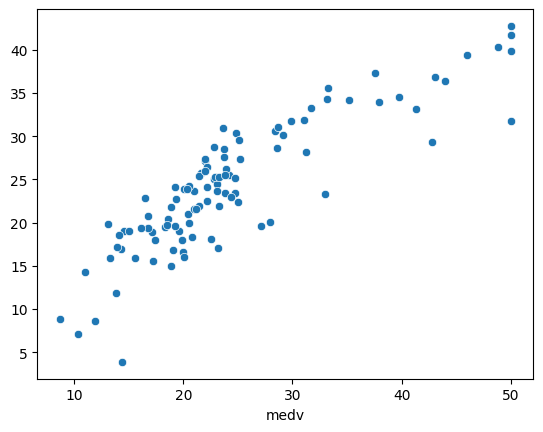

In [42]:
sns.scatterplot(x=Y_test, y=Y_pred)


<Axes: xlabel='medv'>

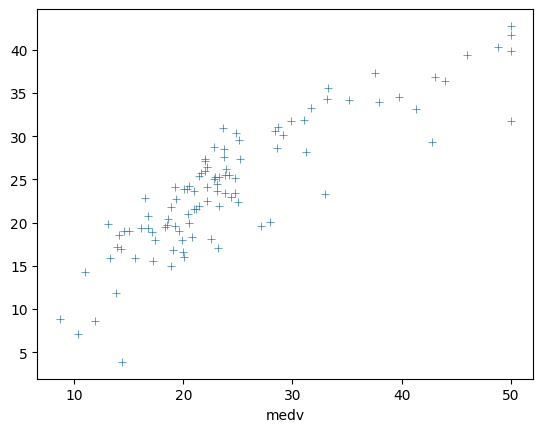

In [44]:
sns.scatterplot(x=Y_test, y=Y_pred, marker="+")


<Axes: xlabel='medv'>

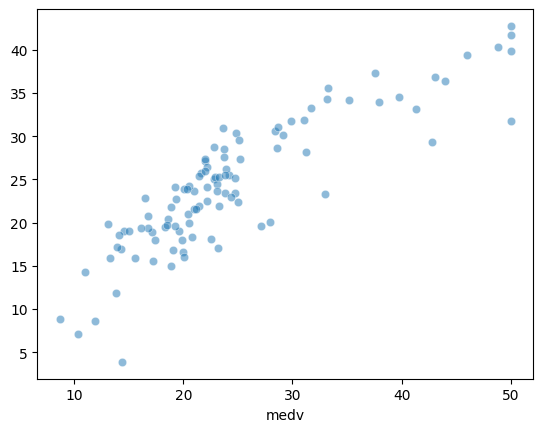

In [46]:
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.5)
